In [27]:
#Buscamos informacion sobre el Total Amount por oportunidad y territorio, para los casos exitosos.
#Para esto calcularemos el Total Amount por oportunidad y nos quedaremos unicamente con las oportunidades ganadas.
#Buscaremos ver estadisticas de los Total Amount de oportunidad por territorio, tales como la media, cuantiles y variacion. 

#Cargo un csv ya limpio
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

data = pd.read_csv("Entrenamieto_ECI_2020_Total_Amount.csv")
#Elimino Nones y me quedo solo con los casos ganados
columns = ['Opportunity_ID', 'Territory', 'Total_Amount(USD)']
gp = data.loc[(data.Territory != 'None') & (data.Stage == 'Closed Won'), columns]
gp

,Opportunity_ID,Territory,Total_Amount(USD)
2,2,NW America,8.386560e+04
7,7,NW America,5.068800e+04
23,11,India,1.621851e+06
63,20,Germany,1.168986e+05
64,21,NW America,3.184974e+06
...,...,...,...
16577,12797,Germany,4.675955e+05
16579,12799,Norway,4.543578e+05
16582,12801,Austria,1.168988e+05
16583,12801,Austria,1.052089e+05


In [28]:
#Sumo los Total Amount de un mismo product_id
limit = 0.2e7
opp_total_amount = gp.groupby(['Territory', 'Opportunity_ID']).sum().reset_index()
#Filtro los outliers que corresponden a montos pertenecientes al 10% mas alto.

opp_total_amount['Quantile'] = opp_total_amount.groupby('Territory')['Total_Amount(USD)']\
                              .transform(lambda x: x.quantile(0.90))
#Ademas filtro outliers particularmente elevados de United Kingdom 
opp_total_amount = opp_total_amount.loc[((opp_total_amount['Territory'] != 'United Kingdom') |\
                                        ((opp_total_amount['Territory'] == 'United Kingdom') &\
                                         (opp_total_amount['Total_Amount(USD)'] < 1e6)))]

opp_total_amount = opp_total_amount.loc[opp_total_amount['Total_Amount(USD)'] < opp_total_amount['Quantile']]
opp_total_amount.loc[opp_total_amount['Territory'] == 'United Kingdom']


,Territory,Opportunity_ID,Total_Amount(USD),Quantile
3943,United Kingdom,23,242619.000000,2.348851e+06
3944,United Kingdom,24,242619.000000,2.348851e+06
3945,United Kingdom,27,359262.750000,2.348851e+06
3946,United Kingdom,28,485238.000000,2.348851e+06
3948,United Kingdom,155,114523.125000,2.348851e+06
...,...,...,...,...
4020,United Kingdom,10115,183680.753138,2.348851e+06
4021,United Kingdom,11111,58195.200000,2.348851e+06
4022,United Kingdom,11144,59488.687500,2.348851e+06
4025,United Kingdom,12746,119104.050000,2.348851e+06


In [29]:
total_amount_mean_by_territories = opp_total_amount.groupby('Territory')\
                                  .agg({'Total_Amount(USD)' : ['mean', 'count']})\
                                  .reset_index()
total_amount_mean_by_territories.columns = ['Territory', 'Opportunity_Total_Amount_mean', 'Number_of_occurrences']

columns = ['Territory','Opportunity_Total_Amount_mean']

total_amount_mean_by_territories = total_amount_mean_by_territories\
                                   .loc[total_amount_mean_by_territories.Number_of_occurrences > 30, columns]\
                                   .sort_values('Opportunity_Total_Amount_mean')
total_amount_mean_by_territories

,Territory,Opportunity_Total_Amount_mean
34,Singapore,24830.947656
16,Indonesia,39100.338889
7,China (PRC),43367.414500
18,Japan,54821.818326
0,Australia,100148.030728
21,Luxembourg,105293.417911
36,Spain,105811.978375
17,Italy,109050.762061
2,Belgium,109188.219022
32,SE America,120987.040463


Text(0, 0.5, 'Monto total de Oportunidad (USD)')

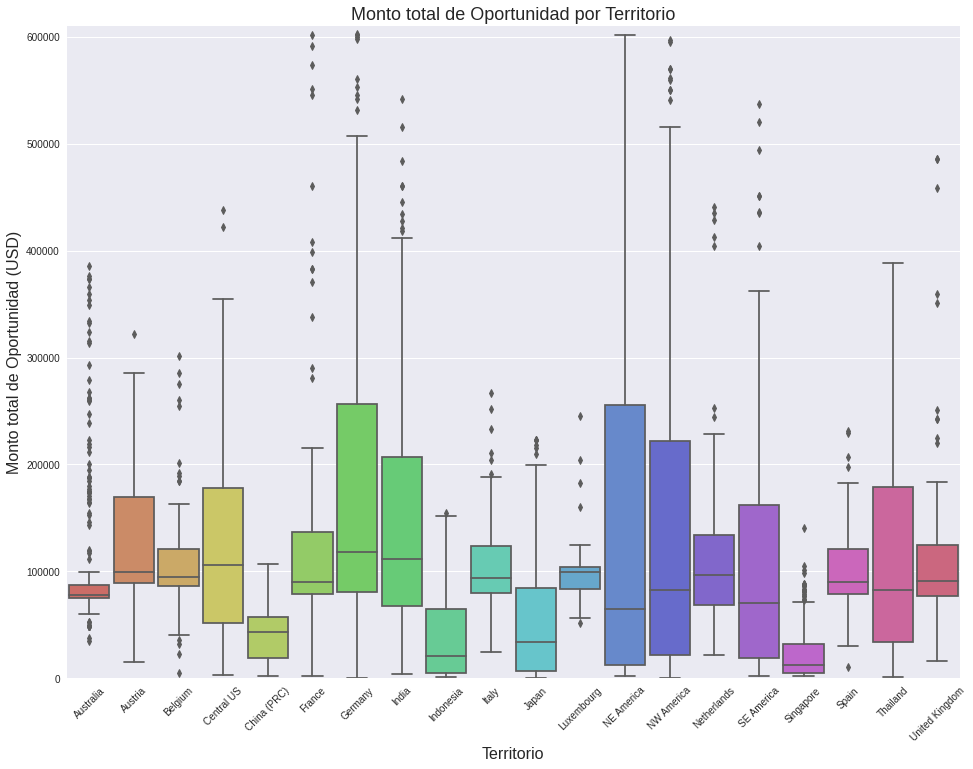

In [30]:
opp_total_amount = opp_total_amount.groupby('Territory')\
                                   .filter(lambda x: (x['Total_Amount(USD)'].count() > 30))

plt.figure(figsize=(16, 12))
plt.ylim(0, 6.1e5)
plt.xticks(rotation=45)

g = sns.boxplot(x="Territory", y="Total_Amount(USD)", 
                     data=opp_total_amount, palette="hls", orient='v', width=0.9)
g.set_title("Monto total de Oportunidad por Territorio", fontsize=18)
g.set_xlabel("Territorio", fontsize=16)
g.set_ylabel("Monto total de Oportunidad (USD)", fontsize=16)


In [31]:
#Del grafico se aprecia que algunos valores maximos se encuentran muy distantes del grueso de la distribucion de precios, por ejemplo para el caso de NE America, NW America y Germany.

# Podemos realizar un zoom cortando los valores maximos para apreciar mejor el grueso de la distribucion de precios

In [32]:
territories = total_amount_mean_by_territories['Territory'].values.tolist()
territories

['Singapore',
 'Indonesia',
 'China (PRC)',
 'Japan',
 'Australia',
 'Luxembourg',
 'Spain',
 'Italy',
 'Belgium',
 'SE America',
 'United Kingdom',
 'Austria',
 'Central US',
 'Thailand',
 'Netherlands',
 'France',
 'India',
 'Germany',
 'NE America',
 'NW America']

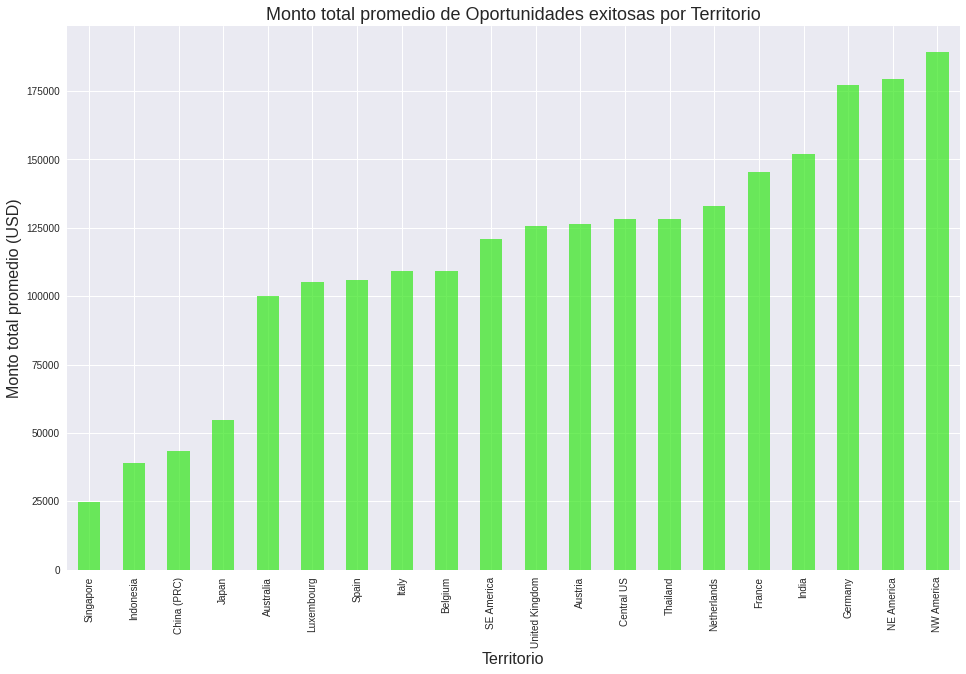

In [33]:
total_amount_mean_by_territories[['Opportunity_Total_Amount_mean']].plot(kind="bar", figsize=(16, 10), color=(0.2,0.9,0.1,0.7))
style.use("seaborn")
ax = plt.gca()
ax.get_legend().remove()
plt.title("Monto total promedio de Oportunidades exitosas por Territorio", fontdict={'size' : 18})
plt.xlabel("Territorio", fontdict={'size' : 16})
plt.ylabel("Monto total promedio (USD)", fontdict={'size' : 16})
plt.xticks(np.arange(len(territories)), territories)
plt.show()

In [34]:
# En este grafico podemos apreciar la media de precio de oportunidad por territorio, algo que no quedaba claro en el boxplot anterior, ahora uno podria hacerse la pregunta de como cambia la probabilidad de exito segun las desviaciones de la media de precio.